In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Загрузка данных

Обратимся к нашим данным. Нас просят предсказать цену автомобиля. Для обучения модели выделим целевой столбец:

In [9]:
data = pd.read_excel('data/data_ford_price.xlsx') 

In [10]:
y = data['price']
X = data.drop(columns='price')

# Предобработка

Попробуем применить линейную регрессию на «сырых» данных:

In [11]:
lr = LinearRegression()
lr.fit(X,y)

ValueError: could not convert string to float: 'clean'

Мы получим ошибку с комментарием о том, что не удалось превратить строковое значение в число с плавающей точкой (float).

Чтобы этой ошибки не возникало, необходимо закодировать данные.

В разделе EDA-3 вы познакомились с такими методами кодирования, как:

- порядковое кодирование;
- двоичное кодирование;
- однократное кодирование.

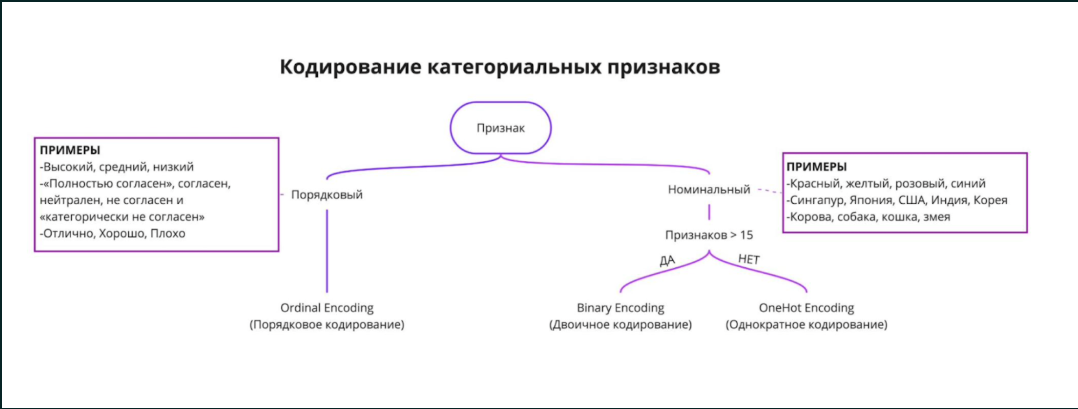

В таблице ниже представлено сравнение данных способов кодировки:

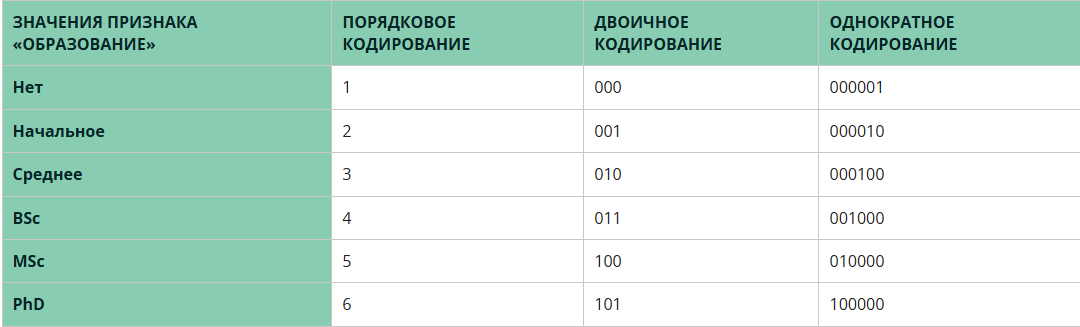

_______________________
Сторонний пример

In [12]:
data

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


Для реализации данных методов мы использовали библиотеку category_encoders. Однако вы уже знаете и такой мощный инструмент, как *scikit-learn*. Данная библиотека содержит набор реализованных алгоритмов машинного обучения, метрик для оценки их качества, а также  класс preprocessing для предобработки данных, в частности — для кодирования категориальных признаков.

Представленная ниже таблица показывает соответствие типа кодирования классу в sklearn.processing.

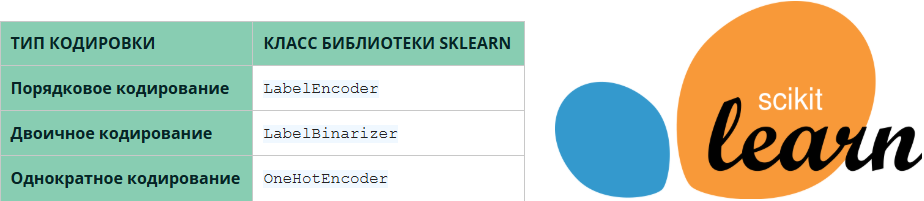

> Преимущество использования одной библиотеки состоит в типичности методов. Например, вы знаете, что для обучения модели в *sklearn* используется метод fit(). При кодировании признаков здесь также применяют fit() для подгонки кодировщика под выборку и transform() — для преобразования данных в числа.

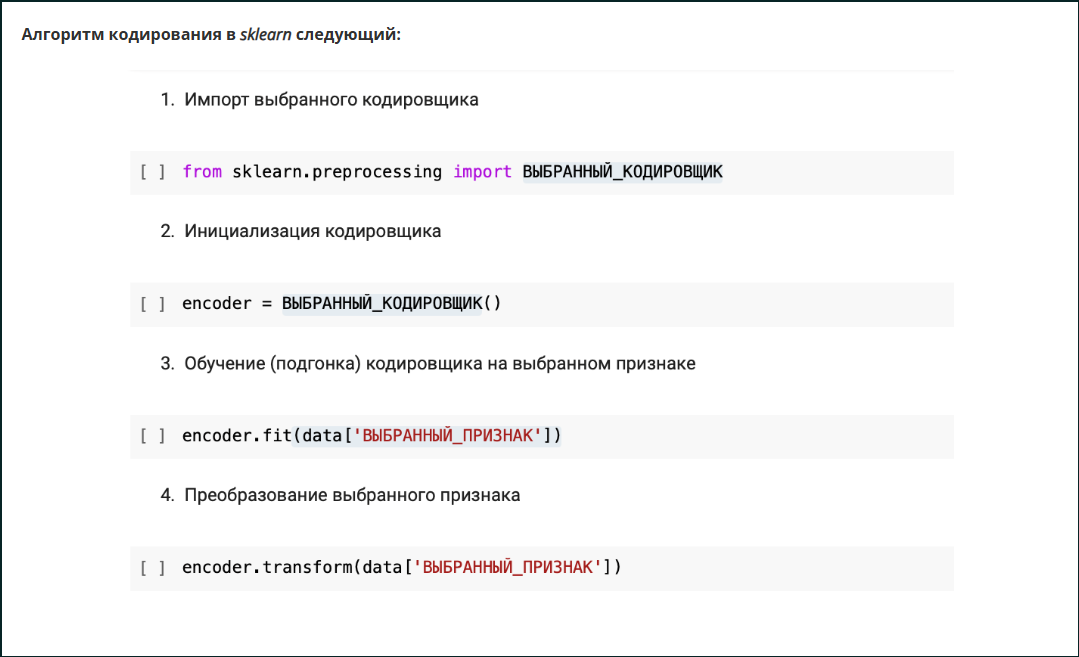

Из предыдущих модулей мы знаем, что при решении задач машинного обучения данные разбираются на обучающую (train) и валидационную (validation) выборки (последняя также может быть тестовой (test) выборкой). По аналогии подгонка кодировщика происходит на обучающей выборке, а трансформация — на обучающей и на тестовой.

Почему так? Потому что наша обученная модель не должна видеть данные, которые подаются в неё на тесте. Только так мы можем судить о том, что модель обучена качественно. То же самое и с кодировкой.

Давайте посмотрим на кодирование признака Образование способом «один-против-всех» (one vs all):

In [14]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
 
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']
lb.fit(education)
 
print('категории:', lb.classes_) 
lb.transform(['нет', 'MSc'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

___________________________________

У класса LabelBinarizer, как и у двух остальных, есть атрибут classes_, который выводит список уникальных значений признака.

Вернёмся к нашей выборке. В ней присутствуют следующие категориальные признаки: condition, cylinders, title_status, transmission, drive, size.

При этом, признаки condition и cylinders — числовые, а title_status, transmission, drive, size — текстовые.

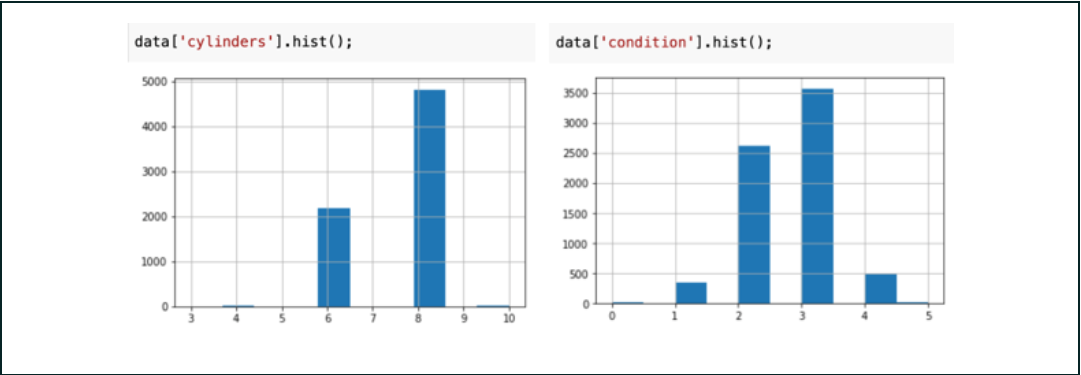

### Задание 3.3

Какой тип имеет признак condition?

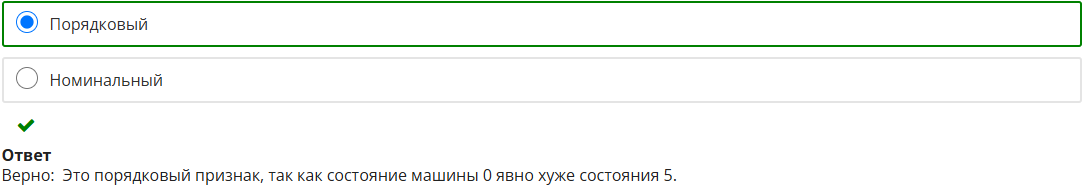

### Задание 3.4

Какой тип имеет признак cylinders?

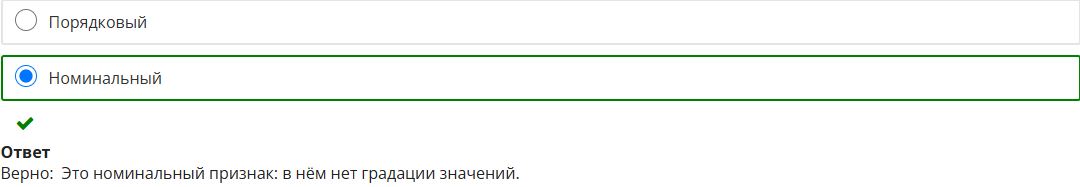

### Задание 3.5

Нужно ли преобразовывать признаки cylinders и condition?

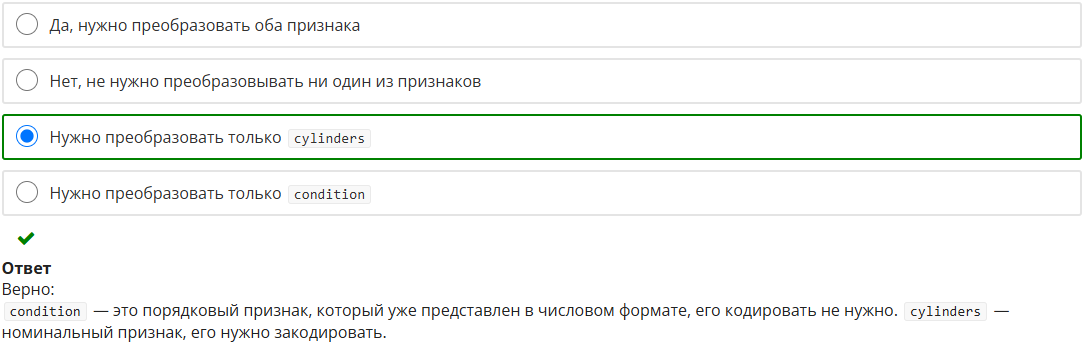

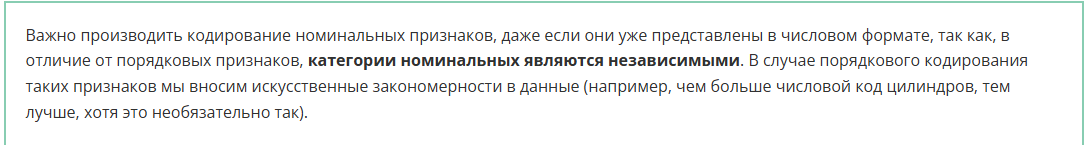

### Задание 3.6

Какой способ кодирования следует выбрать для номинального признака в случае небольшого числа категорий?

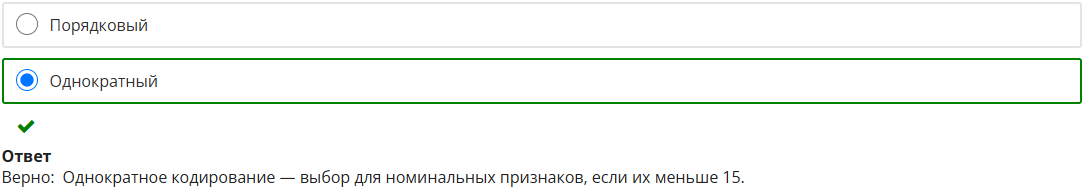

Посмотрим на число уникальных значений номинальных признаков title_status, transmission, drive, size и cylinders:

In [16]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
 print('Число уникальных значений призкака {}: '.format(column), data[column].nunique())

Число уникальных значений призкака cylinders:  6
Число уникальных значений призкака title_status:  5
Число уникальных значений призкака transmission:  3
Число уникальных значений призкака drive:  3
Число уникальных значений призкака size:  4


Итак, нам подходит однократное кодирование. Применим его к выбранным столбцам. Так как у нас нет отдельной тестовой выборки, то мы используем только один метод — fit_transform(). В качестве аргумента передаём таблицу с выбранными для преобразования признаками.

С помощью метода get_feature_names_out() получим список новых названий колонок:

In [2]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray() 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

NameError: name 'data' is not defined

In [1]:
column_names

NameError: name 'column_names' is not defined

### Задание 3.7

Какая форма (количество строк и столбцов) будет у нашего датасета о стоимости автомобилей после кодировки номинальных признаков однократным методом?

Для ответа на поставленный вопрос выполните следующие шаги:

In [20]:
df_oh = pd.DataFrame(data_onehot, columns=column_names)

In [23]:
data = data.drop(columns_to_change, axis = 1)

In [25]:
data = pd.concat([df_oh, data], axis = 1)

In [30]:
data.shape

(7017, 30)